In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import glob, os

files = glob.glob('*.csv')

In [0]:
df = pd.DataFrame()

In [4]:
for num,name in enumerate(files):
  temp = pd.read_csv(name)
  print(num,'th journey - ',temp.shape)
  #print(temp.columns)
  temp['Journey']=num
  df = df.append(temp,sort=True)


0 th journey -  (4824, 11)
1 th journey -  (12253, 11)
2 th journey -  (21644, 11)
3 th journey -  (6589, 11)
4 th journey -  (10169, 11)
5 th journey -  (14415, 11)
6 th journey -  (27380, 11)
7 th journey -  (7444, 11)
8 th journey -  (14595, 11)
9 th journey -  (4558, 11)
10 th journey -  (5377, 11)
11 th journey -  (10077, 11)
12 th journey -  (5584, 11)
13 th journey -  (12060, 11)
14 th journey -  (6412, 11)
15 th journey -  (37935, 11)
16 th journey -  (17444, 11)
17 th journey -  (4426, 11)
18 th journey -  (7530, 11)
19 th journey -  (5050, 11)
20 th journey -  (7478, 11)
21 th journey -  (9158, 11)
22 th journey -  (6414, 11)
23 th journey -  (18191, 11)
24 th journey -  (12080, 11)


In [5]:
df.columns

Index([' timestamp ', 'Journey', 'accuracy', 'bearing', 'height', 'lat', 'lon',
       'speed', 'timestamp', 'type', 'x', 'y', 'z'],
      dtype='object')

In [6]:
df[df[' timestamp '].notnull()].Journey.unique() # journey 17 has not null values in this column

array([17])

In [7]:
df[df[' timestamp '].notnull()][[' timestamp ','Journey','timestamp']]

,timestamp,Journey,timestamp
0,1.434839e+12,17,NaN
1,1.434839e+12,17,NaN
2,1.434839e+12,17,NaN
3,1.434839e+12,17,NaN
4,1.434839e+12,17,NaN
...,...,...,...
4421,1.434839e+12,17,NaN
4422,1.434839e+12,17,NaN
4423,1.434839e+12,17,NaN
4424,1.434839e+12,17,NaN


In [0]:
df.loc[df['Journey']==17,['timestamp']] = df.loc[df['Journey']==17,[' timestamp ']].values

In [9]:
df[df['Journey']==17].head()

,timestamp,Journey,accuracy,bearing,height,lat,lon,speed,timestamp,type,x,y,z
0,1.434839e+12,17,5.0,179.648438,230.88541,44.77757,-85.383821,14.73,1.434839e+12,gps,NaN,NaN,NaN
1,1.434839e+12,17,NaN,NaN,NaN,NaN,NaN,NaN,1.434839e+12,accelerometer,-0.423553,-0.466202,-0.684189
2,1.434839e+12,17,NaN,NaN,NaN,NaN,NaN,NaN,1.434839e+12,accelerometer,-0.479645,-0.532272,-0.728424
3,1.434839e+12,17,NaN,NaN,NaN,NaN,NaN,NaN,1.434839e+12,accelerometer,-0.418701,-0.529617,-0.632751
4,1.434839e+12,17,NaN,NaN,NaN,NaN,NaN,NaN,1.434839e+12,accelerometer,-0.415421,-0.459091,-0.654221


In [0]:
df['unixtime'] = pd.to_datetime(df['timestamp'], unit='ms')


In [11]:
df['unixtime'].dtype

dtype('<M8[ns]')

In [0]:
df.drop([' timestamp ','timestamp'],axis=1,inplace=True)

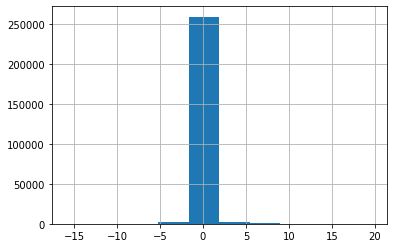

In [14]:
df.x.hist()

In [0]:
type(df['unixtime'].iloc[-1])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
np.datetime64(df['unixtime'].iloc[-1], 's') - np.datetime64(df['unixtime'].iloc[0], 's')

numpy.timedelta64(2927331,'s')

In [0]:
lengthofjourney =[]

In [0]:
for i in df.Journey.unique():
  lengthofjourney.append((df[df['Journey']==i].index[-1] - df[df['Journey']==i].index[0])/3600)

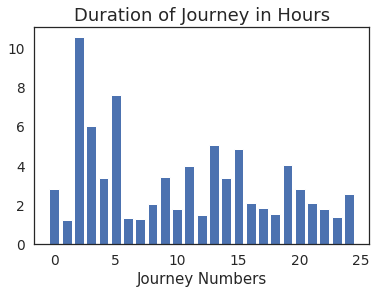

In [0]:
x = np.arange(0,len(lengthofjourney))
plt.bar(x,lengthofjourney)
plt.xlabel('Journey Numbers')
plt.title('Duration of Journey in Hours', fontsize=18)
plt.show()

In [0]:
df = df.set_index('unixtime')

In [0]:
df.isna().sum()

Journey          0
accuracy    264134
bearing     264134
height      264134
lat         264134
lon         264134
speed       264134
type             0
x            24953
y            24953
z            24953
dtype: int64

In [0]:
df.interpolate(inplace=True)

In [0]:
df.bfill(inplace=True)

In [0]:
df.isna().sum()

Journey     0
accuracy    0
bearing     0
height      0
lat         0
lon         0
speed       0
type        0
x           0
y           0
z           0
dtype: int64

In [0]:
from geopy.distance import geodesic
distofjourney =[]

for i in df.Journey.unique():
  origin = (df[df['Journey']==i].lat.iloc[0] , df[df['Journey']==i].lon.iloc[0])
  dest = (df[df['Journey']==i].lat.iloc[-1] , df[df['Journey']==i].lon.iloc[-1])
  distofjourney.append(geodesic(origin, dest).kilometers)
  print('Journey ',i,' : ',geodesic(origin, dest).kilometers,'kms')



Journey  0  :  1959.8917316095174 kms
Journey  1  :  0.7769019212385466 kms
Journey  2  :  2614.868513521071 kms
Journey  3  :  1728.0864431810705 kms
Journey  4  :  386.4070327876831 kms
Journey  5  :  292.73313349629007 kms
Journey  6  :  207.48327304289754 kms
Journey  7  :  5.426708850745085 kms
Journey  8  :  397.25736867052035 kms
Journey  9  :  491.59829977256874 kms
Journey  10  :  1371.4591214518287 kms
Journey  11  :  603.5136232065893 kms
Journey  12  :  871.5572224349768 kms
Journey  13  :  256.14117053305347 kms
Journey  14  :  892.1102999740032 kms
Journey  15  :  10.103287073813028 kms
Journey  16  :  120.40761765748121 kms
Journey  17  :  777.6245146124996 kms
Journey  18  :  1499.6589588281665 kms
Journey  19  :  1474.3741226240797 kms
Journey  20  :  1478.546932834485 kms
Journey  21  :  3.75570484975855 kms
Journey  22  :  259.89313254568384 kms
Journey  23  :  292.9989465302027 kms
Journey  24  :  4.211492260458584 kms


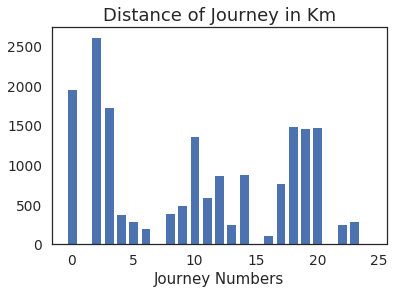

In [0]:
x = np.arange(0,len(distofjourney))
plt.bar(x,distofjourney)
plt.xlabel('Journey Numbers')
plt.title('Distance of Journey in Km', fontsize=18)
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [0]:
for i in df.Journey.unique():
  data = df[df['Journey']==i][['bearing', 'height', 'lat','lon','speed','x','y','z']]
  scaler = StandardScaler()
  np_scaled = scaler.fit_transform(data)
  data = pd.DataFrame(np_scaled)
 
  model =  IsolationForest()
  model.fit(data) 
  df.loc[df['Journey'] == i, 'anomaly'] = model.predict(data)


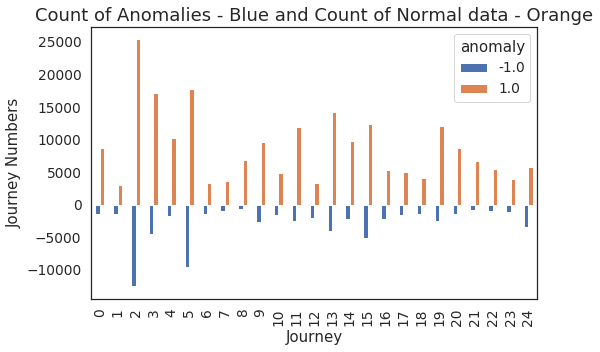

In [0]:
df.groupby(['Journey','anomaly'])['anomaly'].agg('sum').unstack().plot(kind='bar',figsize=(8,5))
plt.ylabel('Journey Numbers')
plt.title('Count of Anomalies - Blue and Count of Normal data - Orange', fontsize=18)
plt.show()

In [0]:
newcols = list(pd.get_dummies(df['type']).columns.values)

In [0]:
df[newcols] = pd.get_dummies(df['type'])

In [0]:
df = df.drop('type',axis = 1)
df.head()

,Journey,accuracy,bearing,height,lat,lon,speed,x,y,z,anomaly,accelerometer,gps
unixtime,,,,,,,,,,,,,
2015-03-21 22:23:51.406,0,5.0,284.062500,11.150000,25.780730,-80.318042,26.309999,-0.145325,-0.068924,-1.076080,-1.0,0,1
2015-03-21 22:23:51.801,0,5.0,284.062500,11.755458,25.780751,-80.318129,26.176666,-0.145325,-0.068924,-1.076080,-1.0,1,0
2015-03-21 22:23:51.898,0,5.0,284.062500,12.360917,25.780771,-80.318216,26.043333,-0.089325,-0.041916,-0.921906,-1.0,1,0
2015-03-21 22:23:51.981,0,5.0,284.062500,12.966375,25.780792,-80.318302,25.910000,-0.072670,-0.046890,-1.038162,-1.0,0,1
2015-03-21 22:23:51.995,0,5.0,284.003906,13.009075,25.780797,-80.318321,25.853333,-0.056015,-0.051865,-1.154419,-1.0,1,0


In [0]:
!pip install hmmlearn
from hmmlearn import hmm

In [0]:
for i in df.Journey.unique():
  X = df[df['Journey']==i][['bearing', 'height', 'lat', 'lon','gps','accelerometer','x','y','z']].values
  model = hmm.GaussianHMM(n_components=2, covariance_type="full", random_state=7).fit(X)
  df.loc[df['Journey'] == i, 'events'] = model.predict(X)
  print('\n\nJourney = ',i,':')
  print('Convergence Status = ',model.monitor_.converged)




Journey =  0 :
Convergence Status =  True


Journey =  1 :
Convergence Status =  True


Journey =  2 :
Convergence Status =  True


Journey =  3 :
Convergence Status =  True


Journey =  4 :
Convergence Status =  True


Journey =  5 :
Convergence Status =  True


Journey =  6 :
Convergence Status =  True


Journey =  7 :
Convergence Status =  True


Journey =  8 :
Convergence Status =  True


Journey =  9 :
Convergence Status =  True


Journey =  10 :
Convergence Status =  True


Journey =  11 :
Convergence Status =  True


Journey =  12 :
Convergence Status =  True


Journey =  13 :
Convergence Status =  True


Journey =  14 :
Convergence Status =  True


Journey =  15 :
Convergence Status =  True


Journey =  16 :
Convergence Status =  True


Journey =  17 :
Convergence Status =  True


Journey =  18 :
Convergence Status =  True


Journey =  19 :
Convergence Status =  True


Journey =  20 :
Convergence Status =  True


Journey =  21 :
Convergence Status =  True


Journey =  22 :
Co

In [0]:
#model.monitor_
#print("Means and vars of each hidden state")
#for i in range(model.n_components):
#    print("{0}th hidden state".format(i))
#    print("mean = ", model.means_[i])
#    #print("var = ", np.diag(model.covariances_[i]))
#    print()

In [0]:
import seaborn as sns
from matplotlib import cm

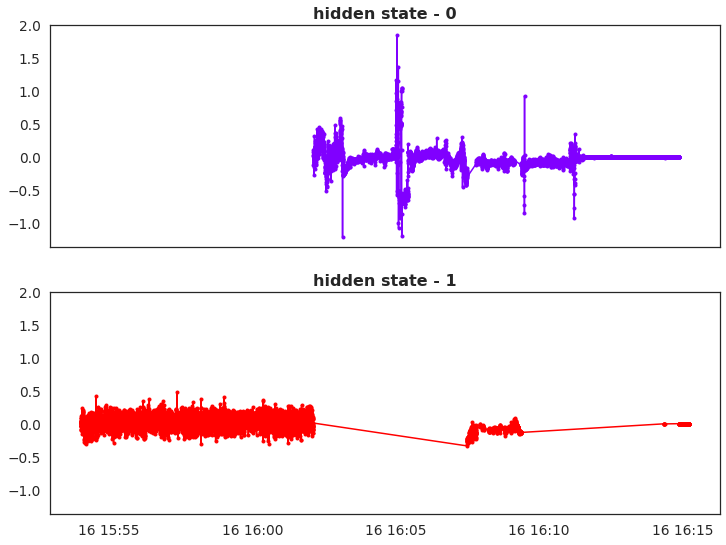

In [0]:
hidden_states = df[df['Journey'] == 11]['events']
select = df[df['Journey'] == 11].loc[:].dropna()

sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 2, 'ytick.major.size': 2,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(12,9))
colors = cm.rainbow(np.linspace(0, 1, 2))

for i, (ax, color) in enumerate(zip(axs, colors)):

    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(select.index.values[mask],
                 select['x'].values[mask],
                 ".-", c=color)
    ax.set_title("hidden state - {0}".format(i), fontsize=16, fontweight='demi')

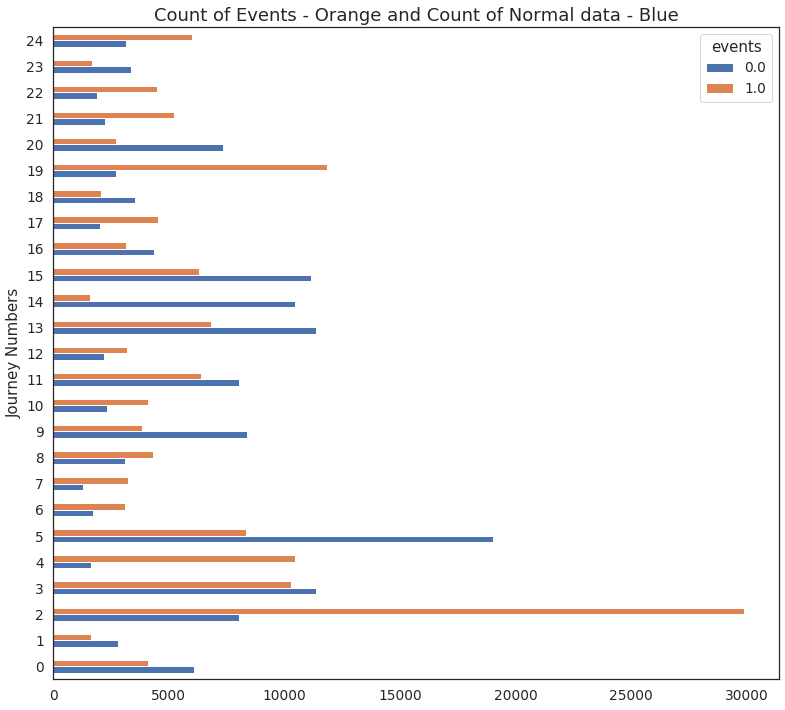

In [0]:
df.groupby(['Journey','events'])['events'].agg('count').unstack().plot(kind='barh',figsize=(13,12))
plt.ylabel('Journey Numbers')
plt.title('Count of Events - Orange and Count of Normal data - Blue', fontsize=18)
plt.show()

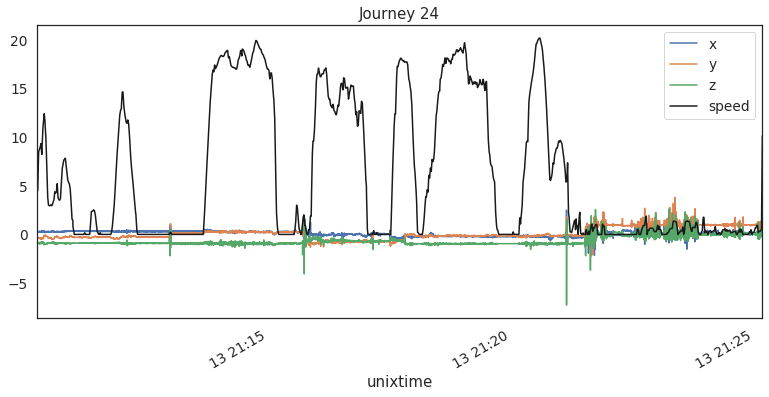

In [0]:
df[df['Journey']==20]['x'].plot(label='x',figsize=(13,6))
df[df['Journey']==20]['y'].plot()
df[df['Journey']==20]['z'].plot()
df[df['Journey']==20]['speed'].plot(c='k')
plt.legend()
plt.title('Journey 24')
plt.show()

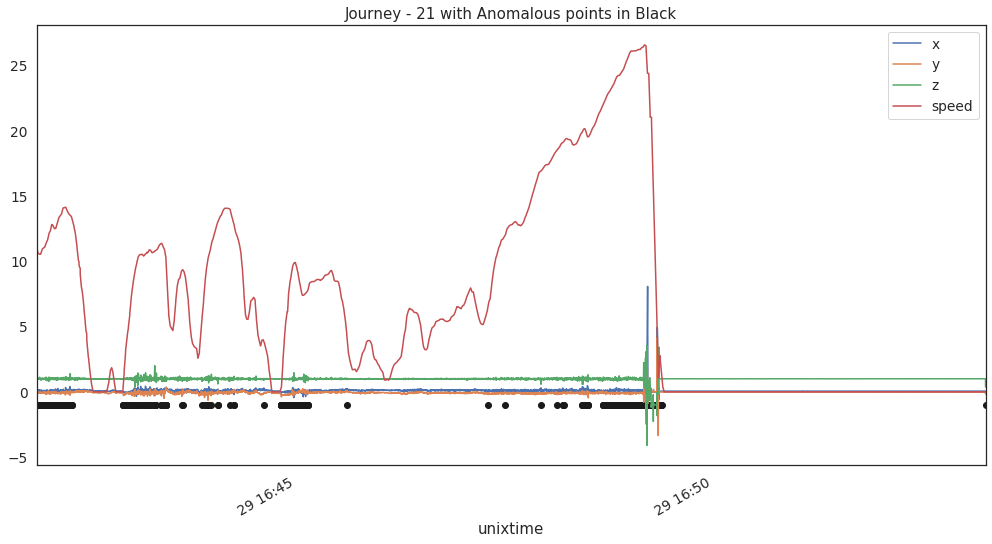

In [0]:
df[df['Journey']==21]['x'].plot(label='x',figsize=(17,9))
df[df['Journey']==21]['y'].plot()
df[df['Journey']==21]['z'].plot()
df[df['Journey']==21]['speed'].plot()
plt.scatter(df[(df.Journey==21) & (df.anomaly==-1)].index,df[(df.Journey==21) & (df.anomaly==-1)]['anomaly'],color='k')
plt.title('Journey - 21 with Anomalous points in Black')
plt.legend()
plt.show()

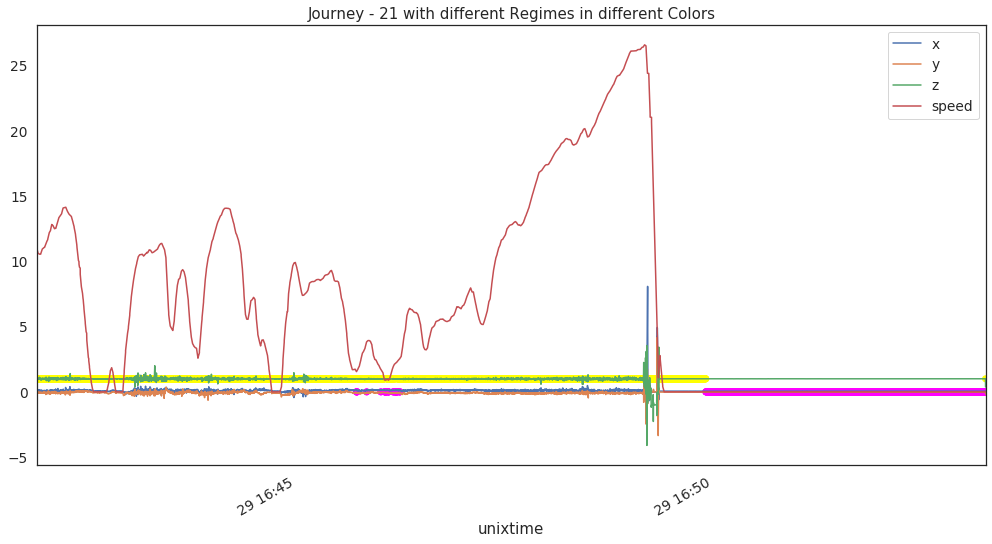

In [0]:
df[df['Journey']==21]['x'].plot(label='x',figsize=(17,9))
df[df['Journey']==21]['y'].plot()
df[df['Journey']==21]['z'].plot()
df[df['Journey']==21]['speed'].plot()
plt.scatter(df[df.Journey==21].index,df[df.Journey==21]['events'],c=df[df.Journey==21]['events'],cmap=plt.cm.spring)
plt.title('Journey - 21 with different Regimes in different Colors')
plt.legend()
plt.show()

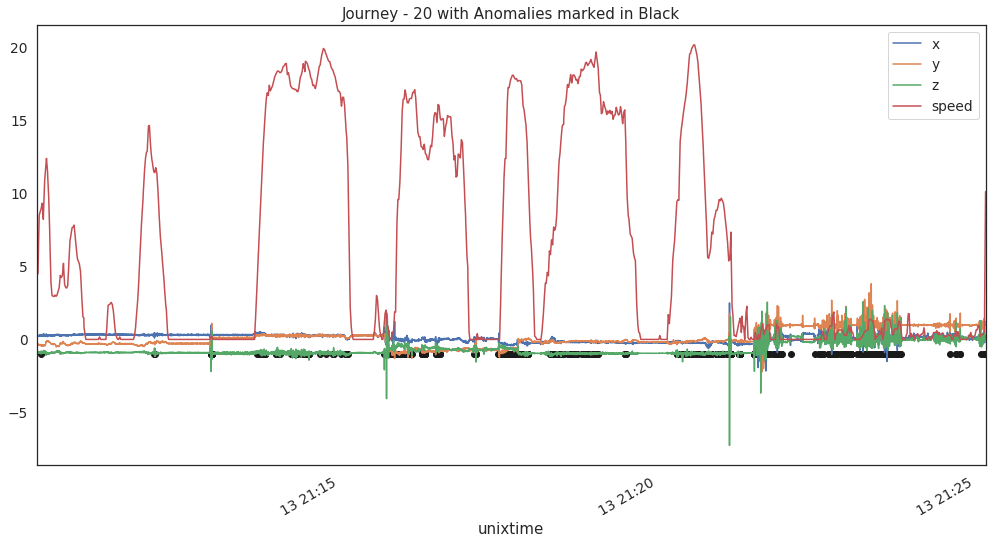

In [0]:
df[df['Journey']==20]['x'].plot(label='x',figsize=(17,9))
df[df['Journey']==20]['y'].plot()
df[df['Journey']==20]['z'].plot()
df[df['Journey']==20]['speed'].plot()
plt.scatter(df[(df.Journey==20) & (df.anomaly==-1)].index,df[(df.Journey==20) & (df.anomaly==-1)]['anomaly'],color="k")
plt.title('Journey - 20 with Anomalies marked in Black')
plt.legend()
plt.show()

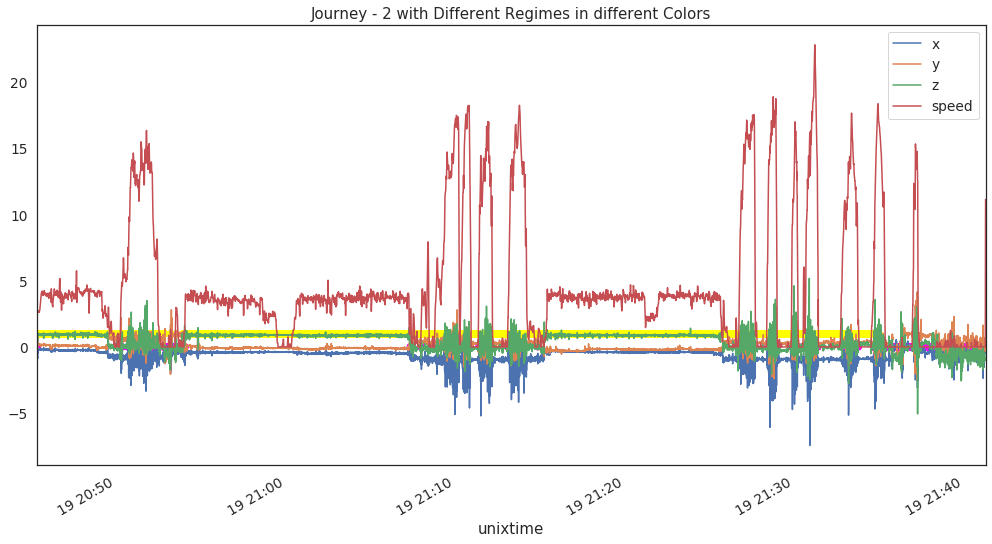

In [0]:
df[df['Journey']==2]['x'].plot(label='x',figsize=(17,9))
df[df['Journey']==2]['y'].plot()
df[df['Journey']==2]['z'].plot()
df[df['Journey']==2]['speed'].plot()
plt.scatter(df[df.Journey==2].index,df[df.Journey==2]['events'],c=df[df.Journey==2]['events'],cmap=plt.cm.spring)
plt.title('Journey - 2 with Different Regimes in different Colors')
plt.legend()
plt.show()

#Misc Plots made to explore data 
## Run only with Shape file

In [0]:
from mpl_toolkits import mplot3d

In [0]:
#Journey 21 seems to have 3 clusters

In [0]:
import plotly.express as px

fig = px.scatter_3d(df[df['Journey']==24], x='x', y='y', z='z',
              color='type')
fig.show()

In [0]:
import plotly.express as px

fig = px.scatter_3d(df[df['Journey']==24], x='x', y='y', z='z',
              color='type')
fig.show()

In [0]:
import plotly.express as px

fig = px.scatter_3d(df[df['Journey']==21], x='x', y='y', z='z',
              color='type',symbol='type')
fig.show()

In [0]:
fig = px.scatter_3d(df[df['Journey']==17], x='x', y='y', z='z',
              color='type')
fig.show()

In [0]:

fig = px.line_3d(df[df['Journey']==17], x="x", y="x", z="z")
fig.show()

In [0]:
BBox = (df[df['Journey']==17].lon.min(),   df[df['Journey']==17].lon.max(), df[df['Journey']==17].lat.min(), df[df['Journey']==17].lat.max())

In [0]:
BBox

(-84.33538964, -84.32297998, 33.81942177, 33.83399828)

In [0]:
map17 = plt.imread('newJ17.png')

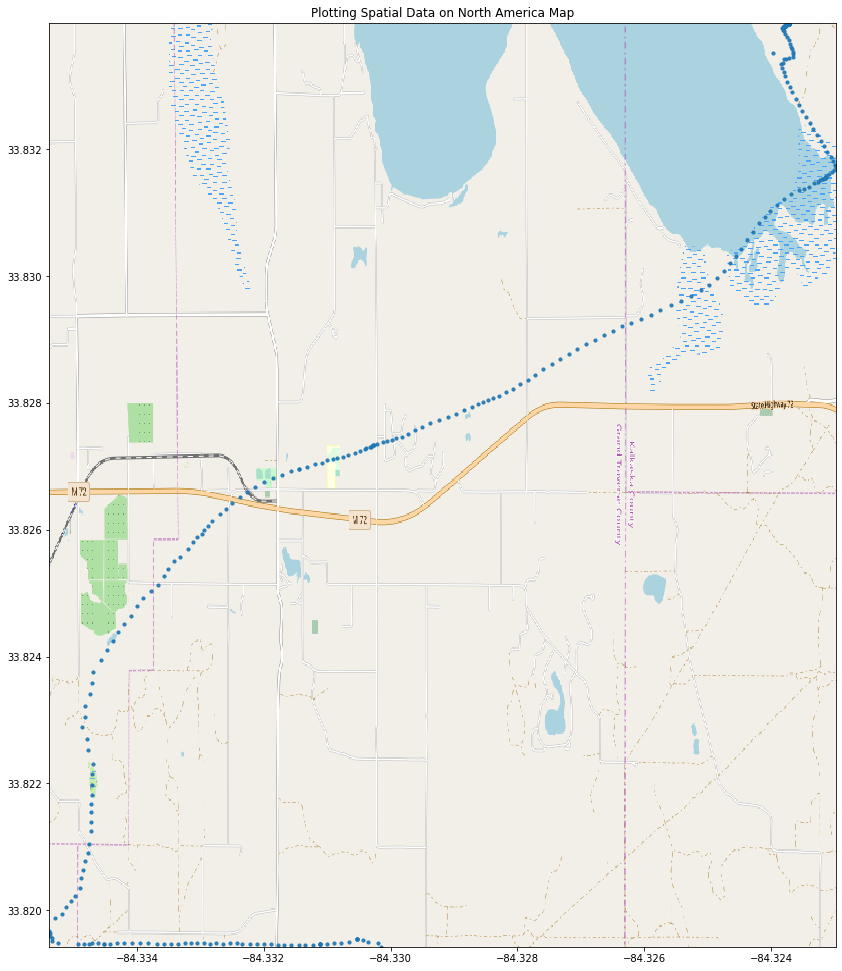

In [0]:
fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(df[df['Journey']==17].lon.dropna(), df[df['Journey']==17].lat.dropna(), zorder=1, alpha= 0.9, s=10)
ax.set_title('Plotting Spatial Data on North America Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map17, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

In [0]:
BBox = (df[df['Journey']==21].lon.min(),   df[df['Journey']==21].lon.max(), df[df['Journey']==21].lat.min(), df[df['Journey']==21].lat.max())

In [0]:
BBox

(-88.24849983, -88.24382382, 40.094194200000004, 40.11932574)

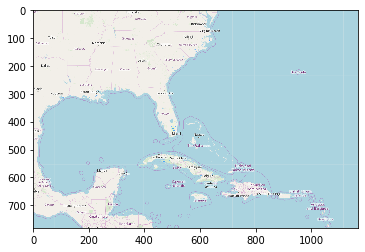

In [0]:
map21 = plt.imread('newJ21.png')
plt.imshow(map21)

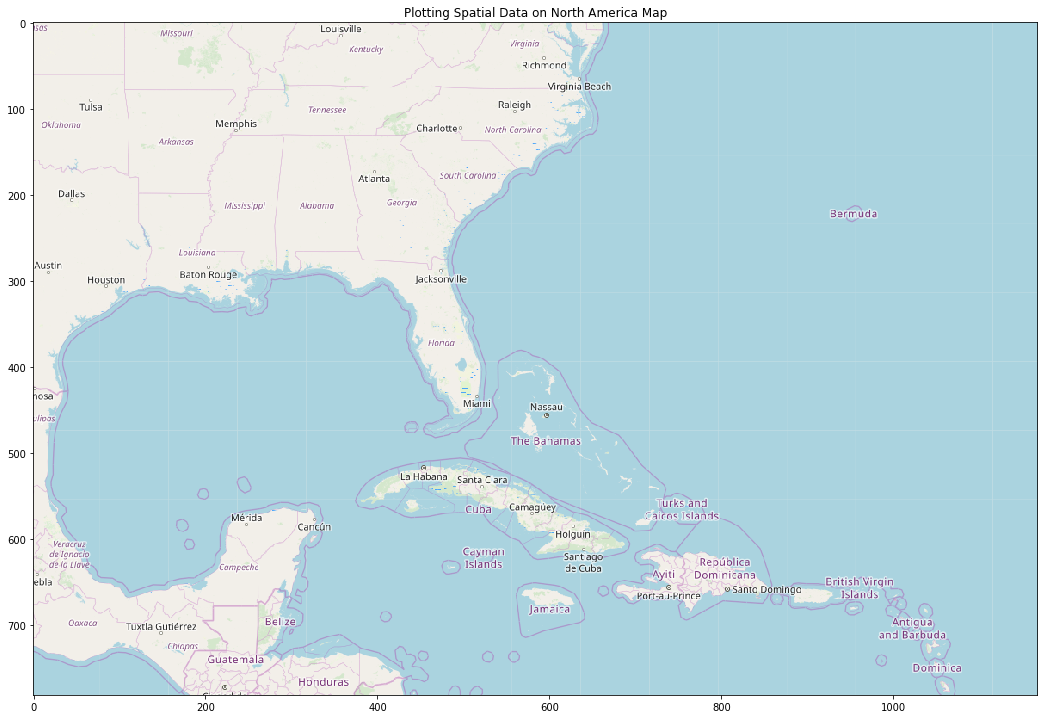

In [0]:
fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(df[df['Journey']==21].lon.dropna(), df[df['Journey']==21].lat.dropna(), zorder=1, alpha= 0.9, s=10)
ax.set_title('Plotting Spatial Data on North America Map')

ax.imshow(map21, zorder=0,  aspect= 'equal')
plt.show()

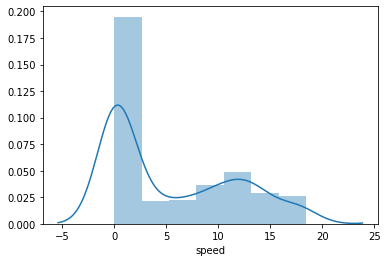

In [0]:
import seaborn as sns
sns.distplot(df[df['Journey']==21].speed.dropna())

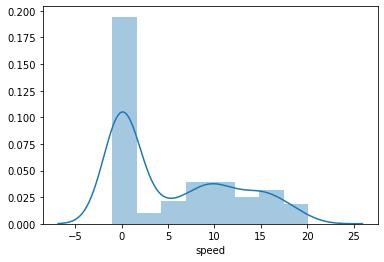

In [0]:
sns.distplot(df[df['Journey']==17].speed.dropna())

In [0]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 10.1MB 15.9MB/s 
     |████████████████████████████████| 11.8MB 43.4MB/s 


In [0]:
# Create a DataFrame with health facilities in Ghana
import geopandas as gpd

In [0]:
regions = gpd.read_file("states.shp")
print(regions.crs)

{'init': 'epsg:4269'}


In [0]:

# Convert the DataFrame to a GeoDataFrame
geodf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

# Set the coordinate reference system (CRS) to EPSG 4326
geodf.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
geodf.head()

,Journey,accuracy,bearing,height,lat,lon,speed,type,x,y,z,geometry
unixtime,,,,,,,,,,,,
2015-03-19 20:45:21.058870117,0,5.0,195.46875,2980.754597,39.189448,-106.948849,2.67,gps,NaN,NaN,NaN,POINT (-106.949 39.189)
2015-03-19 20:45:21.113870117,0,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,-0.233551,0.144394,0.960358,POINT (nan nan)
2015-03-19 20:45:21.209870117,0,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,-0.256973,0.161850,0.940002,POINT (nan nan)
2015-03-19 20:45:21.306870117,0,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,-0.171021,0.205933,0.975983,POINT (nan nan)
2015-03-19 20:45:21.403870117,0,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,-0.079910,0.253296,0.974945,POINT (nan nan)


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



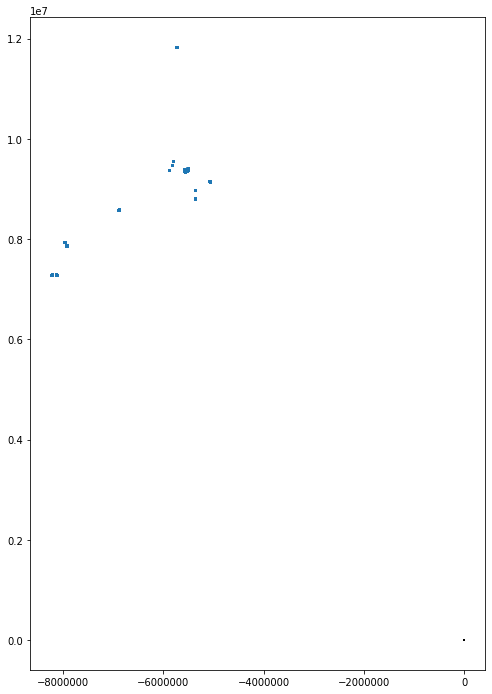

In [0]:
ax = regions.plot(figsize=(18,12),color='whitesmoke', linestyle = '-',edgecolor='black')
geodf.to_crs(epsg=32630).plot(markersize=1, ax=ax)
plt.show()

In [0]:
geodf.dropna().to_crs(epsg=32630).head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



,Journey,accuracy,bearing,height,lat,lon,speed,type,x,y,z,geometry
unixtime,,,,,,,,,,,,


In [0]:
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07381 22.00417, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [0]:
df[df['Journey']==17].head()

,Journey,accuracy,bearing,height,lat,lon,speed,type,x,y,z,geometry
unixtime,,,,,,,,,,,,
NaT,17,5.0,341.71875,292.545256,33.819422,-84.330149,7.08,gps,NaN,NaN,NaN,POINT (-84.330 33.819)
NaT,17,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,0.103683,-0.439667,-0.995590,POINT (nan nan)
NaT,17,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,0.061203,-0.426544,-0.935394,POINT (nan nan)
NaT,17,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,0.156418,-0.443115,-0.899475,POINT (nan nan)
NaT,17,NaN,NaN,NaN,NaN,NaN,NaN,accelerometer,0.186539,-0.374420,-0.914475,POINT (nan nan)


In [0]:
df[df['Journey']==17][['accuracy','bearing','height','lat','lon','speed']].ffill(axis = 0) 

,accuracy,bearing,height,lat,lon,speed
unixtime,,,,,,
NaT,5.0,341.718750,292.545256,33.819422,-84.330149,7.08
NaT,5.0,341.718750,292.545256,33.819422,-84.330149,7.08
NaT,5.0,341.718750,292.545256,33.819422,-84.330149,7.08
NaT,5.0,341.718750,292.545256,33.819422,-84.330149,7.08
NaT,5.0,341.718750,292.545256,33.819422,-84.330149,7.08
...,...,...,...,...,...,...
NaT,5.0,17.929688,267.078402,33.833951,-84.323777,0.00
NaT,5.0,17.929688,267.078402,33.833951,-84.323777,0.00
NaT,5.0,17.929688,267.078402,33.833951,-84.323777,0.00


In [0]:
 for i in df.Journey.unique():
   df[df['Journey']==i][['accuracy','bearing','height','lat','lon','speed']].ffill(axis = 0,inplace=True) 
